In [1]:
train = catalog.load('train')

[03/24/25 18:41:59] INFO     Loading data from train (ParquetDataset)...                        ]8;id=699445;file:///home/felipefg/.pyenv/versions/3.11.3/envs/25E1_3_311/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=497550;file:///home/felipefg/.pyenv/versions/3.11.3/envs/25E1_3_311/lib/python3.11/site-packages/kedro/io/data_catalog.py#390\390]8;;\

In [2]:
from pycaret.classification import *

In [3]:
exp = ClassificationExperiment()
exp.setup(data=train, target='Survived', session_id=12345)

,Description,Value
0,Session id,12345
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(714, 11)"
4,Transformed data shape,"(714, 11)"
5,Transformed train set shape,"(499, 11)"
6,Transformed test set shape,"(215, 11)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [4]:
model = exp.create_model('gbc')

<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9400,0.9901,0.9048,0.9500,0.9268,0.8760,0.8768
1,0.8600,0.9524,0.7619,0.8889,0.8205,0.7069,0.7125
2,0.7600,0.8711,0.7143,0.7143,0.7143,0.5074,0.5074
3,0.8400,0.8983,0.9000,0.7500,0.8182,0.6774,0.6864
4,0.7200,0.6767,0.4500,0.7500,0.5625,0.3750,0.4015
5,0.8400,0.8658,0.7000,0.8750,0.7778,0.6552,0.6651
6,0.8000,0.8308,0.6000,0.8571,0.7059,0.5614,0.5819
7,0.7600,0.8167,0.5500,0.7857,0.6471,0.4737,0.4910
8,0.8800,0.9100,0.8000,0.8889,0.8421,0.7458,0.7485


<IPython.core.display.HTML object>

In [5]:
randcv_model = exp.tune_model(model, n_iter=100, optimize='F1')

<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9836,0.9048,0.8636,0.8837,0.7961,0.7967
1,0.8600,0.9507,0.8095,0.8500,0.8293,0.7107,0.7114
2,0.8000,0.8834,0.7619,0.7619,0.7619,0.5895,0.5895
3,0.8800,0.9300,0.9000,0.8182,0.8571,0.7541,0.7566
4,0.7400,0.7200,0.5000,0.7692,0.6061,0.4248,0.4467
5,0.8400,0.8567,0.7000,0.8750,0.7778,0.6552,0.6651
6,0.8200,0.8300,0.6500,0.8667,0.7429,0.6087,0.6236
7,0.7800,0.8383,0.6500,0.7647,0.7027,0.5299,0.5343
8,0.9000,0.9100,0.8000,0.9412,0.8649,0.7863,0.7929


<IPython.core.display.HTML object>

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [10]:
bscv_model = exp.tune_model(model, optimize='F1', search_library='scikit-optimize', n_iter=100)

<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9000,0.9721,0.8571,0.9000,0.8780,0.7934,0.7941
1,0.8600,0.9113,0.7619,0.8889,0.8205,0.7069,0.7125
2,0.7800,0.8539,0.7143,0.7500,0.7317,0.5455,0.5459
3,0.9200,0.9350,0.9500,0.8636,0.9048,0.8361,0.8389
4,0.7200,0.7283,0.5000,0.7143,0.5882,0.3860,0.4001
5,0.8200,0.8617,0.7500,0.7895,0.7692,0.6218,0.6224
6,0.8000,0.8083,0.7000,0.7778,0.7368,0.5763,0.5784
7,0.8000,0.8233,0.6500,0.8125,0.7222,0.5690,0.5776
8,0.8400,0.9267,0.8000,0.8000,0.8000,0.6667,0.6667


<IPython.core.display.HTML object>

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [11]:
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=12345, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [12]:
randcv_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='log_loss', max_depth=3,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.005, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=230, n_iter_no_change=None,
                           random_state=12345, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [13]:
bscv_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.07615429680954892, loss='log_loss',
                           max_depth=11, max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=1e-09, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=232, n_iter_no_change=None,
                           random_state=12345, subsample=0.44009996851126987,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

<IPython.core.display.HTML object>

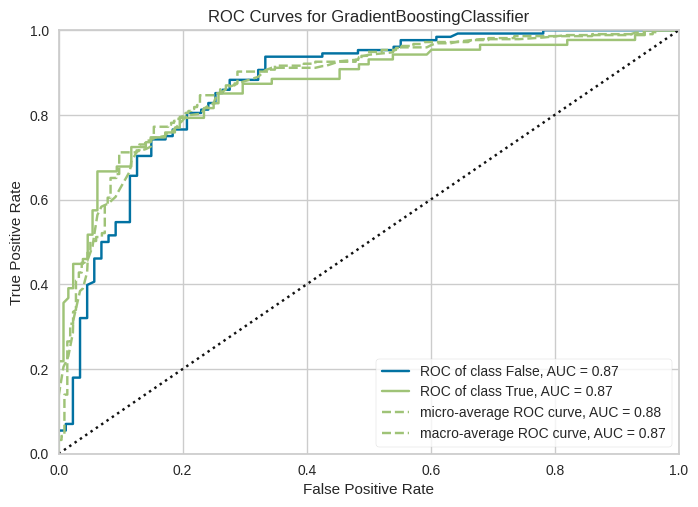

In [15]:
ret = exp.plot_model(bscv_model, plot='auc')

In [17]:
import matplotlib.pyplot as plt

<IPython.core.display.HTML object>

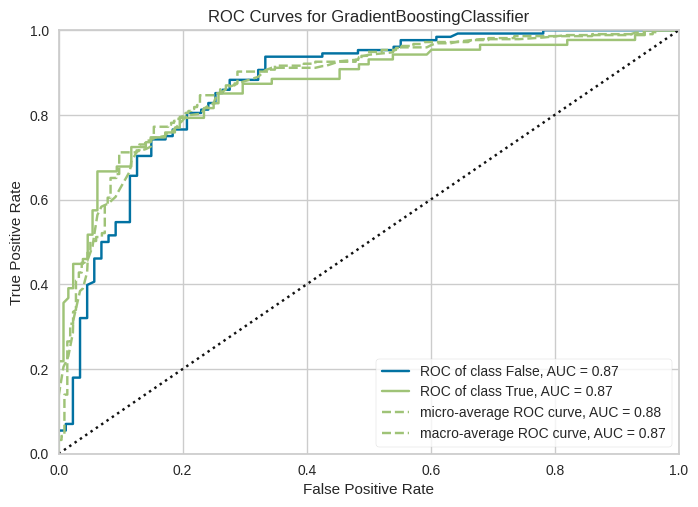

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [19]:
ret = exp.plot_model(bscv_model, plot='auc')
fig = plt.gcf()
fig